In [1056]:
!unzip "/content/archive (9).zip"

Archive:  /content/archive (9).zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes.csv            


In [1057]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score

In [1058]:
dataset=pd.read_csv("/content/diabetes.csv" ,na_values=['0'])

In [ ]:
dataset['Pregnancies'].fillna(0, inplace=True)
dataset['Outcome'].fillna(0, inplace=True)

In [1060]:
dataset.shape

(768, 9)

In [1061]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


In [1062]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [1063]:
dataset.duplicated().sum()


np.int64(0)

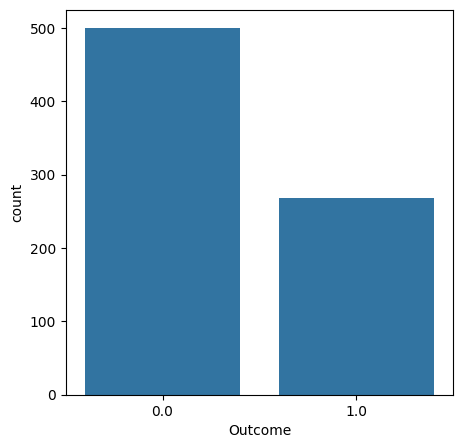

In [1064]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outcome', data=dataset)
plt.show()

In [1065]:
dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


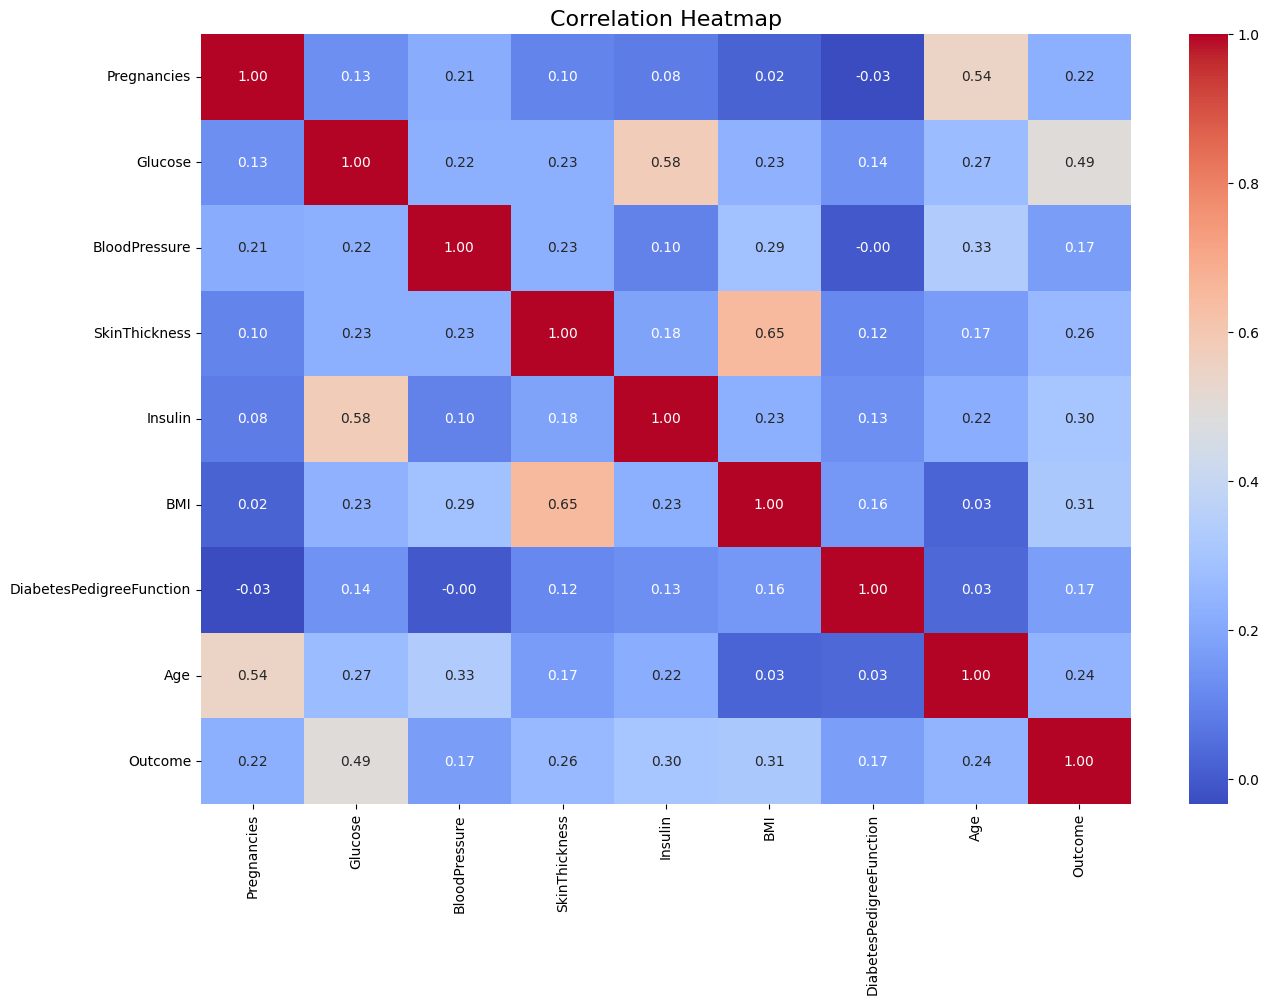

In [1066]:
corr = dataset.corr()


plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [1067]:

x = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']


In [1068]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1069]:
train_data = x_train.copy()
train_data['Outcome'] = y_train.values


glucose_means = train_data.groupby('Outcome')['Glucose'].median()

cols_to_impute = ['Glucose', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure']


medians_by_output = train_data.groupby('Outcome')[cols_to_impute].median()


def fill_missing(row):
    for col in cols_to_impute:
        if pd.isnull(row[col]):
            row[col] = medians_by_output.loc[row['Outcome'], col]
    return row

train_data = train_data.apply(fill_missing, axis=1)

x_train[cols_to_impute] = train_data[cols_to_impute]


print(x_train.isnull().sum())




Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [1070]:
x_train.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


In [1071]:
test_data = x_test.copy()
test_data['Outcome'] = y_test.values

test_data = test_data.apply(fill_missing, axis=1)

x_test[cols_to_impute] = test_data[cols_to_impute]


In [1072]:
x_test.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


In [1073]:

full_data = x.copy()
full_data['Outcome'] = y.values


full_data = full_data.apply(fill_missing, axis=1)

x[cols_to_impute] = full_data[cols_to_impute]


print(x[cols_to_impute].isnull().sum())


Glucose          0
BMI              0
Insulin          0
SkinThickness    0
BloodPressure    0
dtype: int64


In [1074]:
x.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


Pregnancies


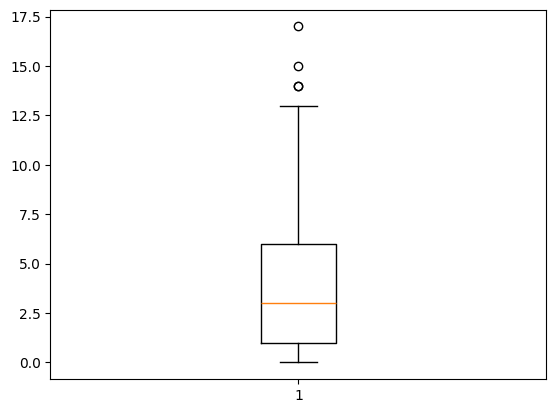

Glucose


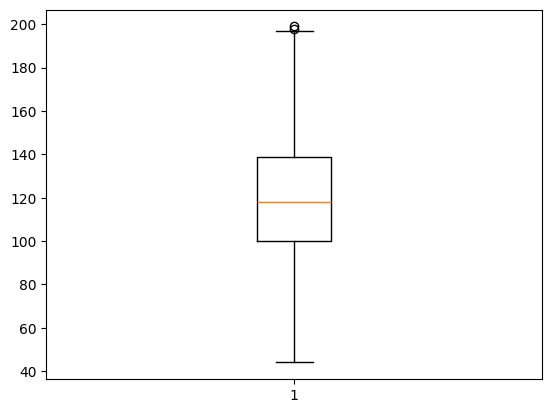

BloodPressure


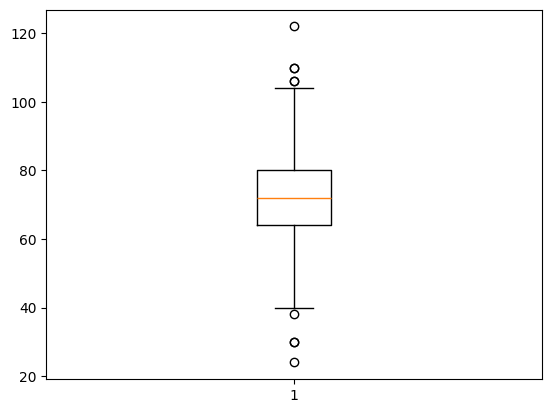

SkinThickness


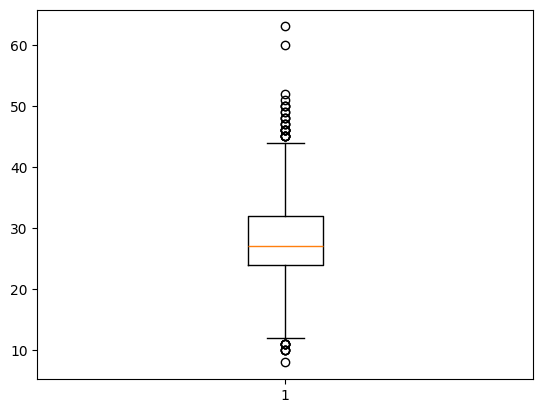

Insulin


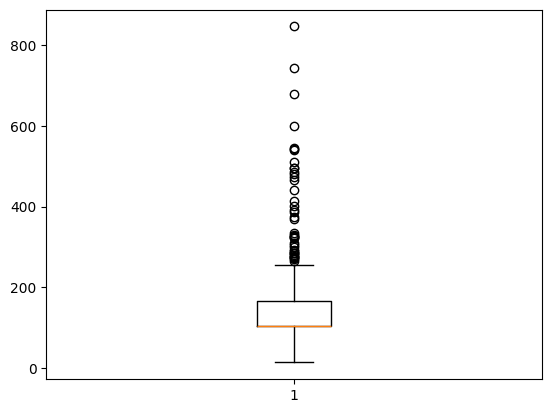

BMI


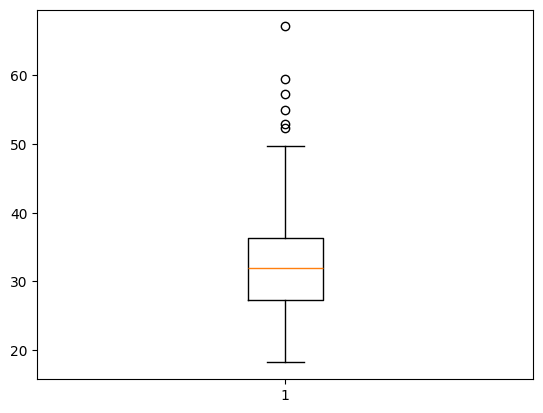

DiabetesPedigreeFunction


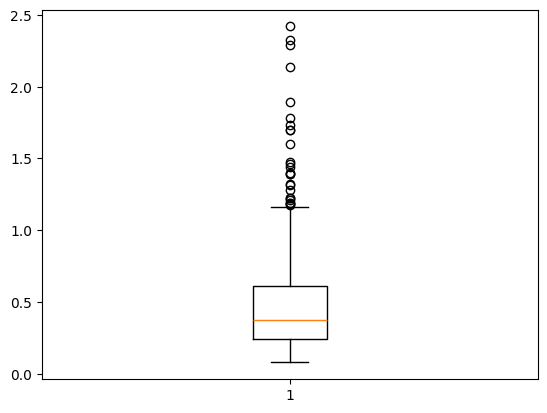

Age


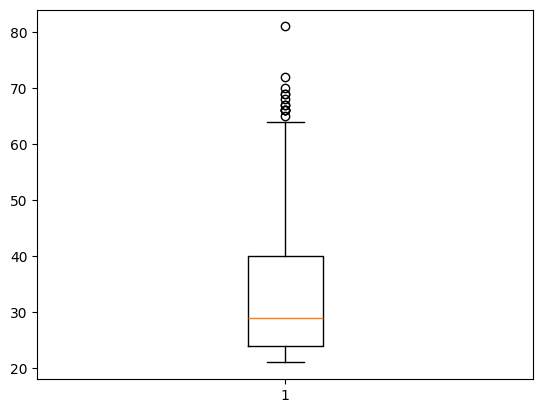

In [1075]:
for i in x_train.columns:
   print(i)
   plt.boxplot(x_train[i])
   plt.show()

In [1076]:
def remove_outliers(df, col_names):
    df_cleaned = df.copy()
    for col in col_names:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned


In [1077]:
cols_with_outliers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [1078]:

train_data = x_train.copy()
train_data['Outcome'] = y_train.values

test_data = x_test.copy()
test_data['Outcome'] = y_test.values

train_data_cleaned = remove_outliers(train_data, cols_with_outliers)
test_data_cleaned = remove_outliers(test_data, cols_with_outliers)


x_train = train_data_cleaned.drop(columns=['Outcome'])
y_train = train_data_cleaned['Outcome']

x_test = test_data_cleaned.drop(columns=['Outcome'])
y_test = test_data_cleaned['Outcome']


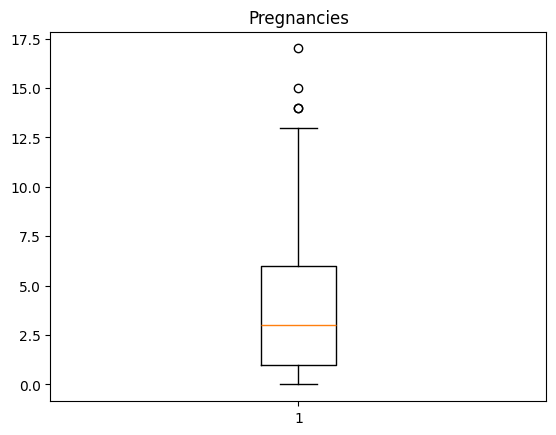

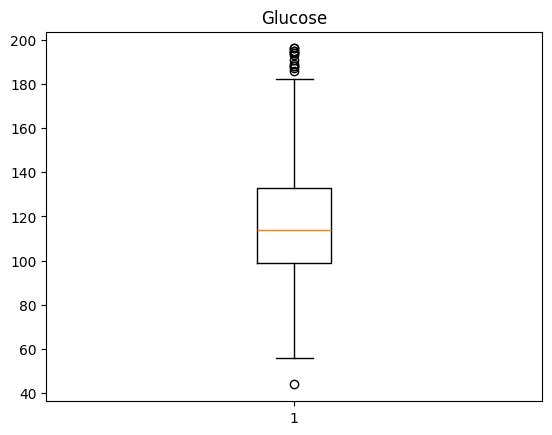

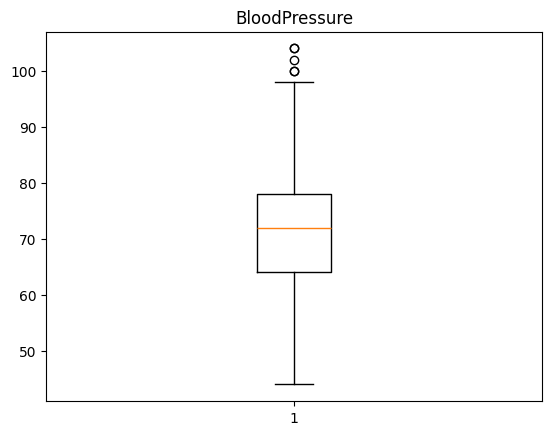

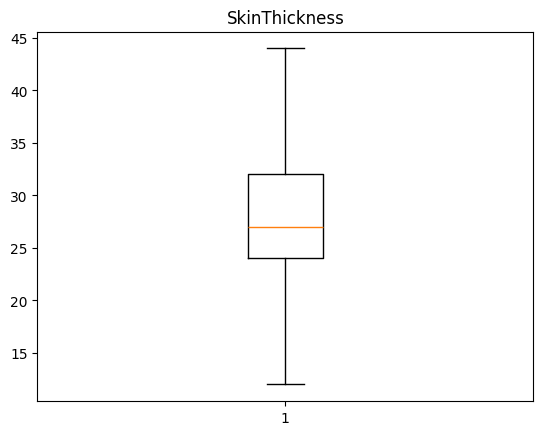

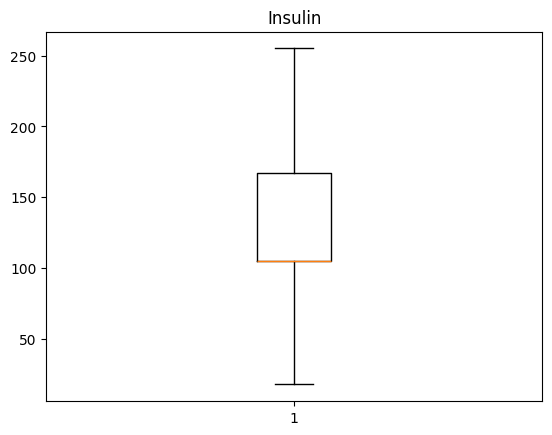

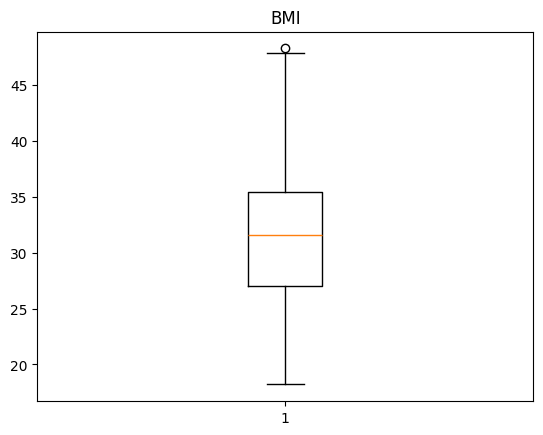

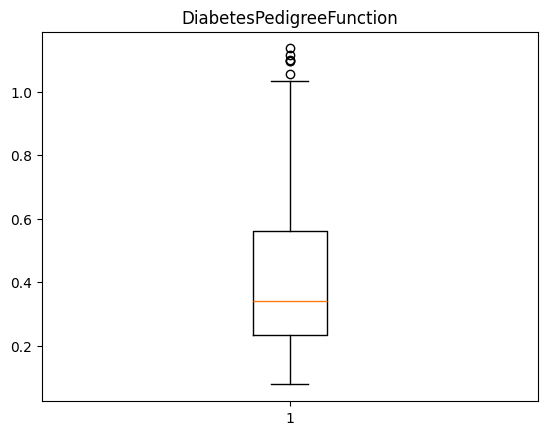

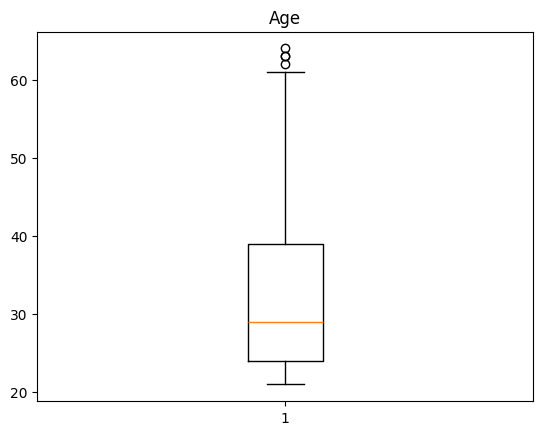

In [1079]:
original_column_names = dataset.columns
original_column_names = x.columns

x_train = pd.DataFrame(x_train, columns=original_column_names)
for col in x_train.columns:
    plt.boxplot(x_train[col])
    plt.title(col)
    plt.show()

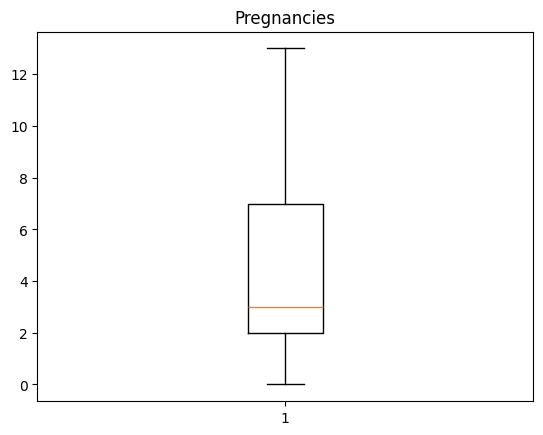

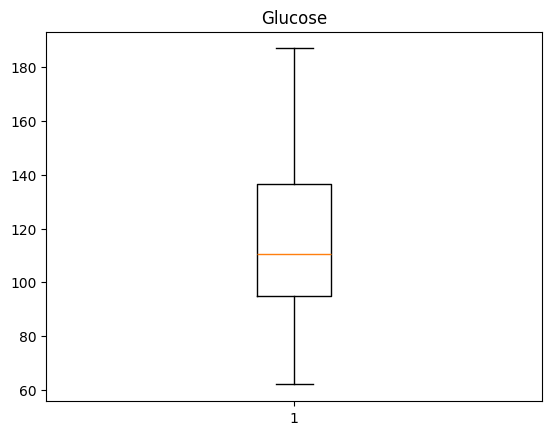

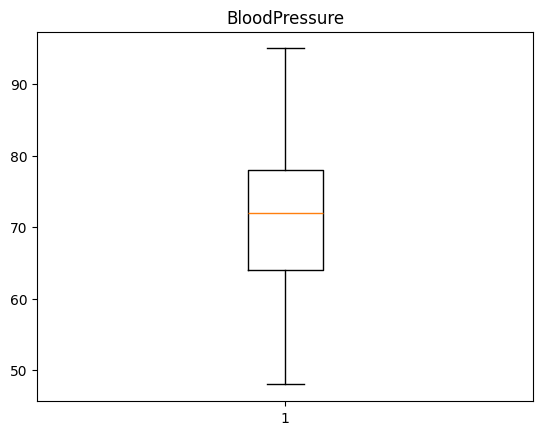

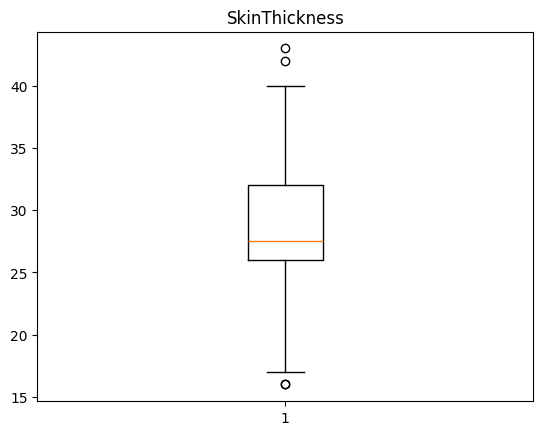

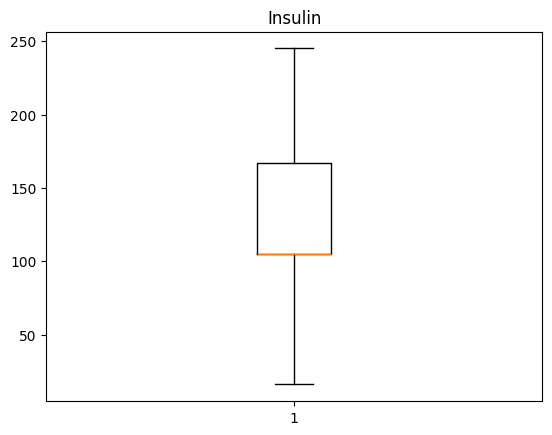

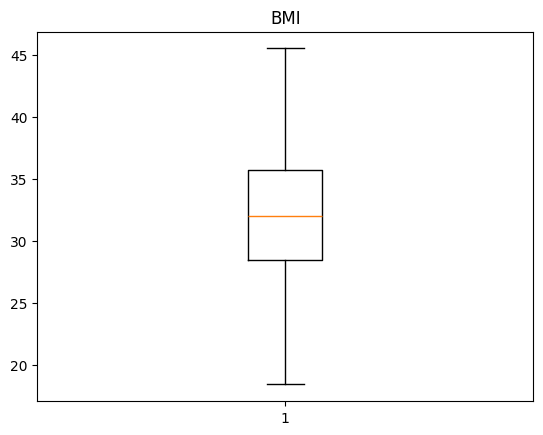

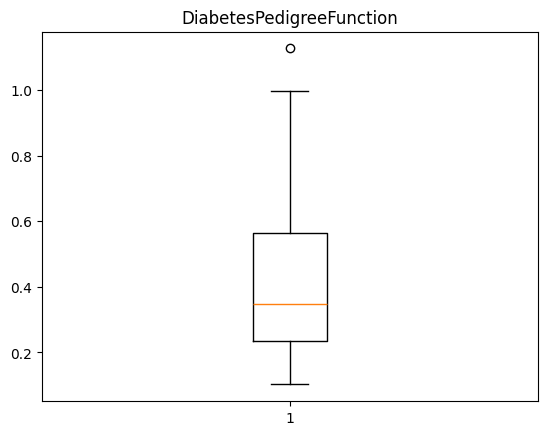

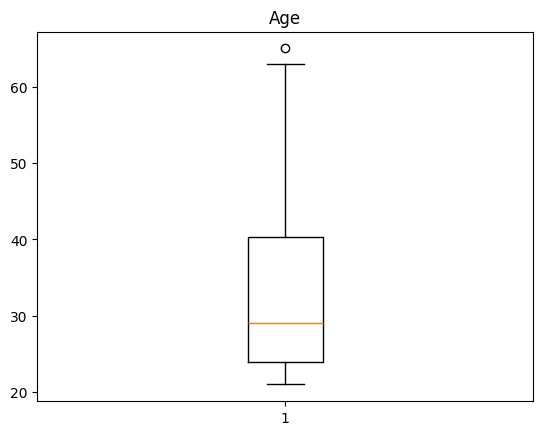

In [1080]:
original_column_names = dataset.columns
original_column_names = x.columns

x_test = pd.DataFrame(x_test, columns=original_column_names)
for col in x_test.columns:
    plt.boxplot(x_test[col])
    plt.title(col)
    plt.show()

In [1081]:
correlation = dataset.corr()['Outcome'].abs().sort_values(ascending=False)
high_correlation_columns = correlation[correlation > 0.2].index.tolist()
high_correlation_columns.remove('Outcome')



In [1082]:
x=x[high_correlation_columns]

In [1083]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [1084]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


In [1085]:
from sklearn.preprocessing import RobustScaler
scaler =RobustScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1086]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 20
error = []
accuracy = []
for i in range(1, k , 2):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  error.append(1-metrics.accuracy_score(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

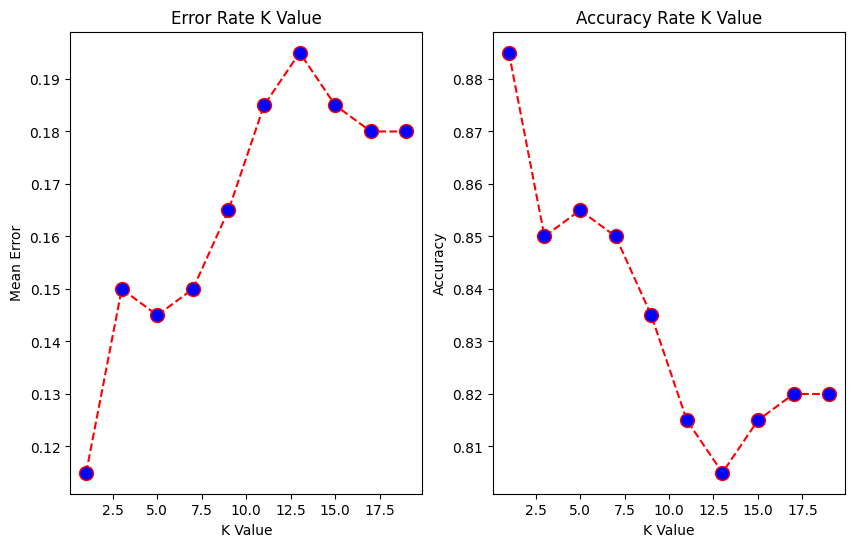

In [1087]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.plot(range(1,k, 2), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

plt.subplot(1,2,2)
plt.plot(range(1,k,2 ), accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [1088]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [1089]:
y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

In [1090]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)

Accuracy on train data:  1.0
Accuracy on test data:  0.885


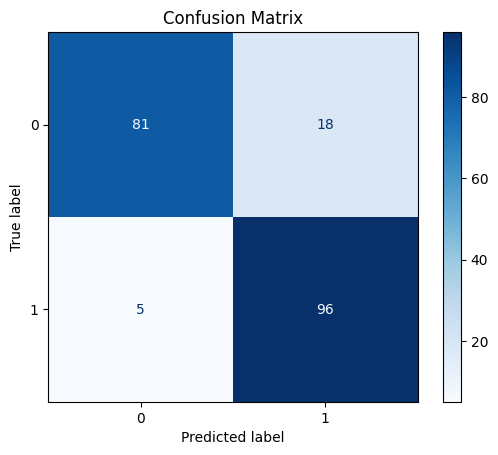

In [1091]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [1092]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [3,5,7,9]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv = 5, refit= True)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [1093]:
print(grid.best_params_)

{'n_neighbors': 5}


In [1094]:
test_score = grid.score(x_test, y_test)
test_score

0.855

In [1095]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [1096]:
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

In [1097]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)

Accuracy on train data:  0.78125
Accuracy on test data:  0.795


In [1098]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train, y_train)

GaussianNB()

In [1099]:
y_pred_test= lr.predict(x_test)
y_pred_train = lr.predict(x_train)

In [1100]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)

Accuracy on train data:  0.78125
Accuracy on test data:  0.795


In [1101]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79        99
         1.0       0.78      0.82      0.80       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



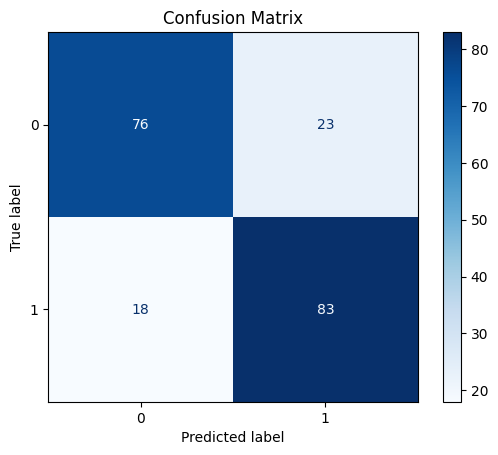

In [1102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [1103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion= 'entropy',max_depth=20)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [1104]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.865

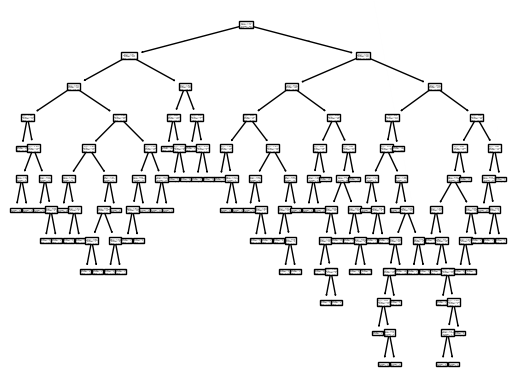

In [1105]:
import sklearn.tree as tree
tree.plot_tree(dt)
plt.show()

In [1106]:
dt.get_depth()

11

In [1107]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [1108]:
rf_classifier.score(x_test, y_test)

0.915

In [1109]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [1110]:
ada_boost.score(x_test, y_test)

0.84

In [1111]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [1112]:
xgb_classifier.score(x_test, y_test)

0.895

In [1113]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [1114]:
print(accuracy_score(y_test, svc.predict(x_test)))
print(accuracy_score(y_train, svc.predict(x_train)))


0.855
0.8975


In [1115]:
from sklearn.model_selection import GridSearchCV
param ={'kernel':['linear','rbf','poly'],'C':[1],'degree':[2,3,4]}
grid = GridSearchCV(SVC(),param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [1116]:
grid.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf'}

In [1117]:
grid.best_score_

np.float64(0.8712500000000001)

In [1118]:
import joblib
joblib.dump(model2, 'model.pkl')


['model.pkl']